In [93]:
import pandas as pd
import LabIFSC2 as lab
import matplotlib.pyplot as plt
import numpy as np
import math

## Carrega dados e define constantes

In [123]:
ar_file_path = './dados_bons/ar_lente_boa/dados.txt'
vidro_file_path = './dados_bons/vidro_lente_boa/dados.txt'
nu = lab.Medida(60, 'MHz', 0)

def get_data(path: str):
    data = pd.read_csv(file_path, sep=',')
    print(f"Raw data: \n{data}")
    processed_data = {
        "d_cm": [(100.0 - d_metal + 12.7) for d_metal in data["d_metal"]],
        "phase_deg": [phi for phi in data["fase"]]
    }
    new_df = pd.DataFrame(data=processed_data)
    new_df.loc[1:,'d_cm'] = abs(new_df.loc[1:, 'd_cm'] - new_df['d_cm'].iloc[0])
    new_df.loc[1:,'phase_deg'] = abs(new_df.loc[1:, 'phase_deg'] - new_df['phase_deg'].iloc[0])
    new_df = new_df.loc[1:, :]
    new_df['d_cm'] = new_df['d_cm'].apply(lambda x: x*0.01)
    new_df = new_df.rename(columns={"d_cm": "d_m"})
    
    return new_df

## Velocidade da luz no Ar

Raw data: 
   d_metal  fase
0     10.5  81.7
1     20.5  73.1
2     30.5  65.1
3     40.5  59.2
4     50.5  53.6
5     60.5  46.1
6     70.5  39.6
7     80.5  32.0
8     90.5  22.2

Velocidades da luz para o Ar com a lente boa:
(2,5 ± 0,3)x10⁸ m/s
(2,6 ± 0,1)x10⁸ m/s
(2,88 ± 0,10)x10⁸ m/s
(3,07 ± 0,08)x10⁸ m/s
(3,03 ± 0,06)x10⁸ m/s
(3,08 ± 0,05)x10⁸ m/s
(3,04 ± 0,04)x10⁸ m/s
(2,90 ± 0,04)x10⁸ m/s

Velocidade da luz no ar (média): (2,89 ± 0,04)x10⁸ m/s



Text(0.5, 1.0, 'Velocidade da luz no ar')

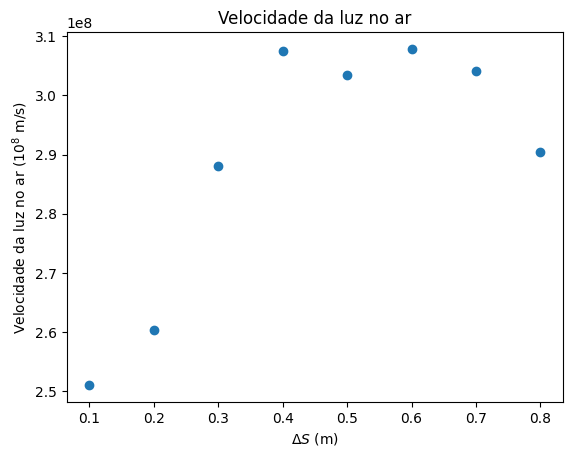

In [122]:
data_ar = get_data(file_path)
data_ar

distancias = [lab.Medida(x, 'm', 0.01) for x in data_ar['d_m'].to_list()]
fases = [lab.Medida(x, 'deg', 0.1) for x in data_ar['phase_deg'].to_list()]
velocidades_ar = []

print("\nVelocidades da luz para o Ar com a lente boa:")
for i, delta_s in enumerate(distancias):
    delta_phi = fases[i]
    c = (delta_s/delta_phi) * 2 * math.pi * nu
    velocidades_ar.append(c)
    print(f"{c:m/s}")
print(f"\nVelocidade da luz no ar (média): {np.mean(np.array(velocidades_ar)):m/s}\n")

f1, ax1 = plt.subplots()

ax1.scatter(lab.nominais(np.array(distancias), 'm'), lab.nominais(np.array(velocidades_ar), 'm/s'))
ax1.set_xlabel("$\\Delta S$ (m)")
ax1.set_ylabel("Velocidade da luz no ar ($10^{8}$ m/s)")
ax1.set_title("Velocidade da luz no ar")

## Velocidade da luz no vidro

In [ ]:
# TODO